# Linear Regression with Python

The dataset contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="bright")

### Check out the Data

In [2]:
df = pd.read_csv("mk009-USA_housing_analysis/USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Exploratory Data Analysis

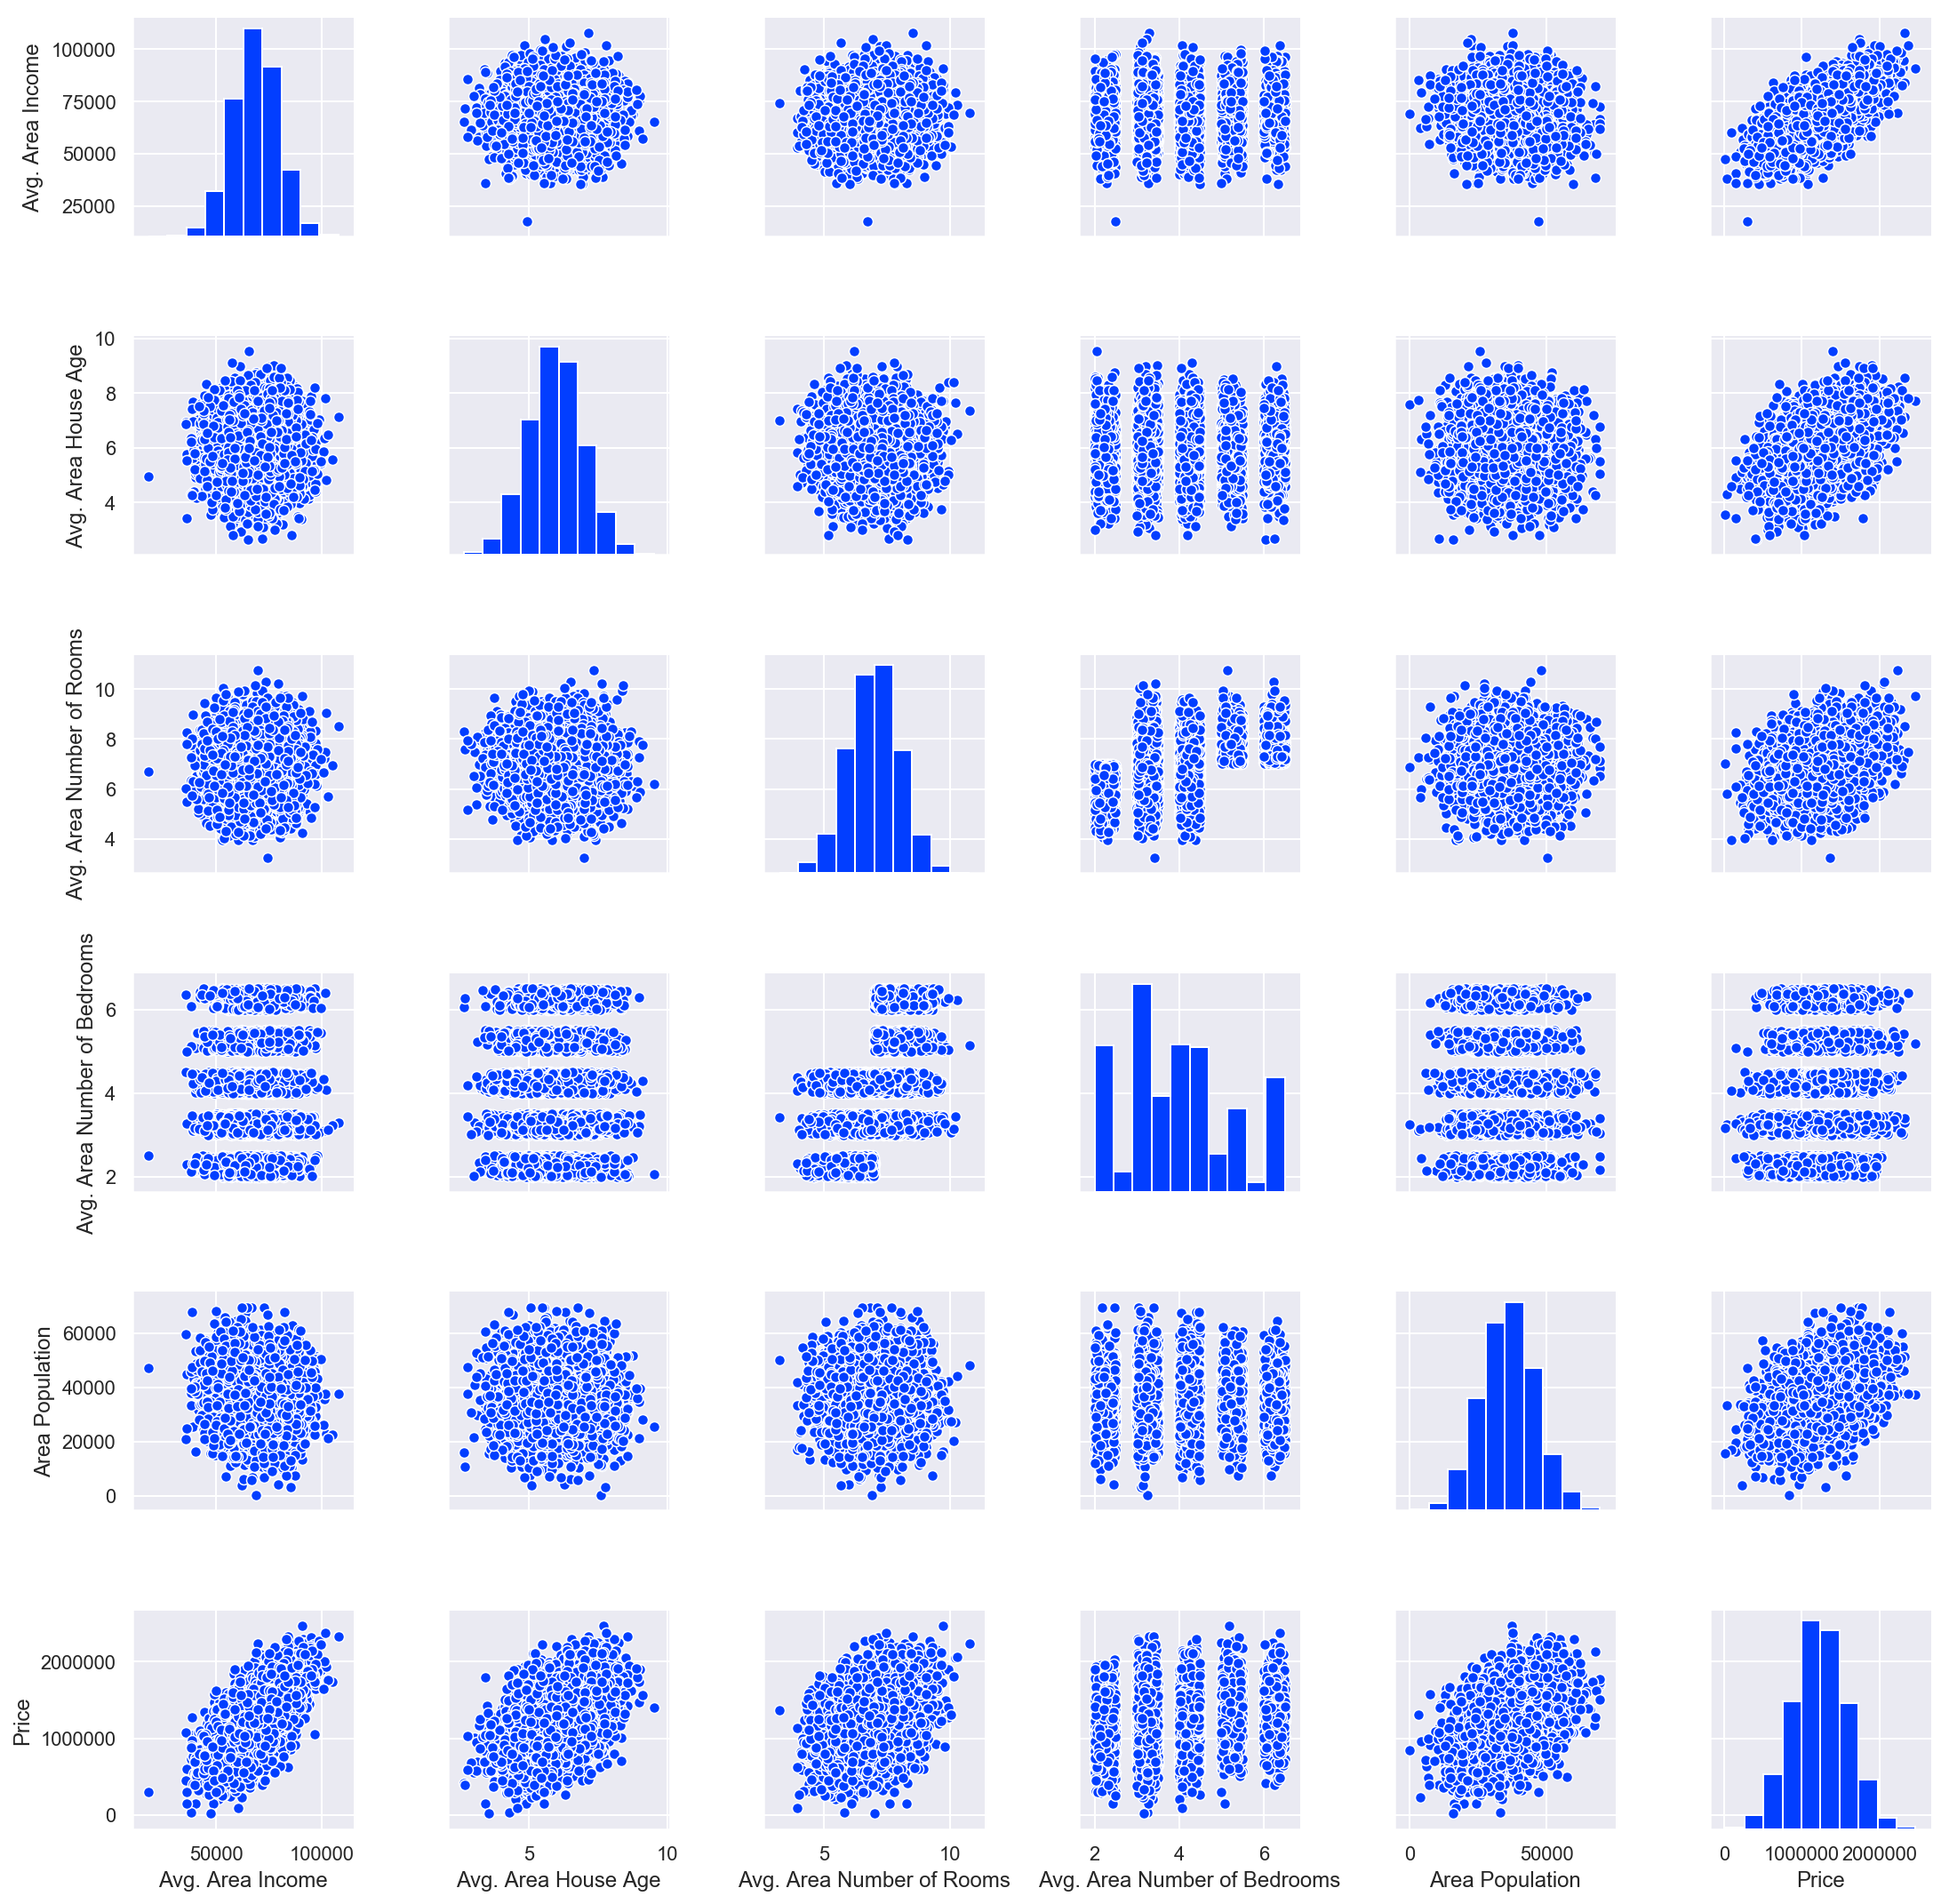

In [7]:
sns.pairplot(df)

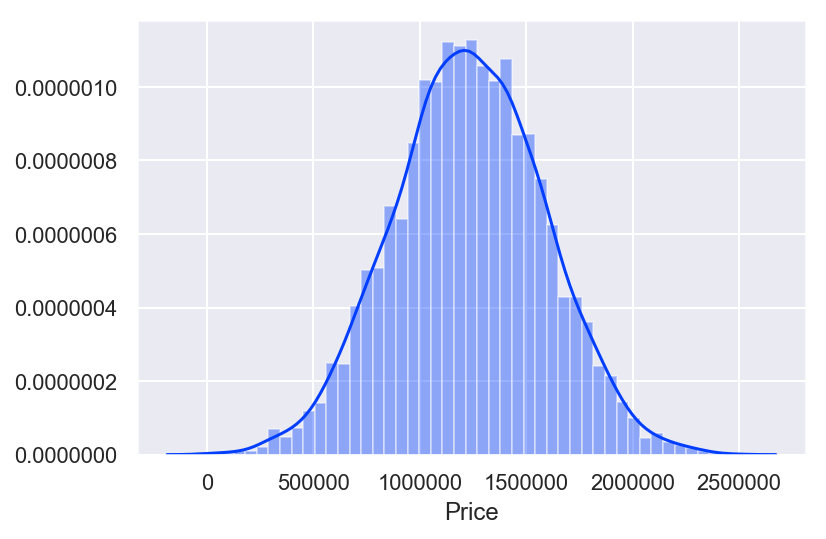

In [8]:
sns.distplot(df["Price"])

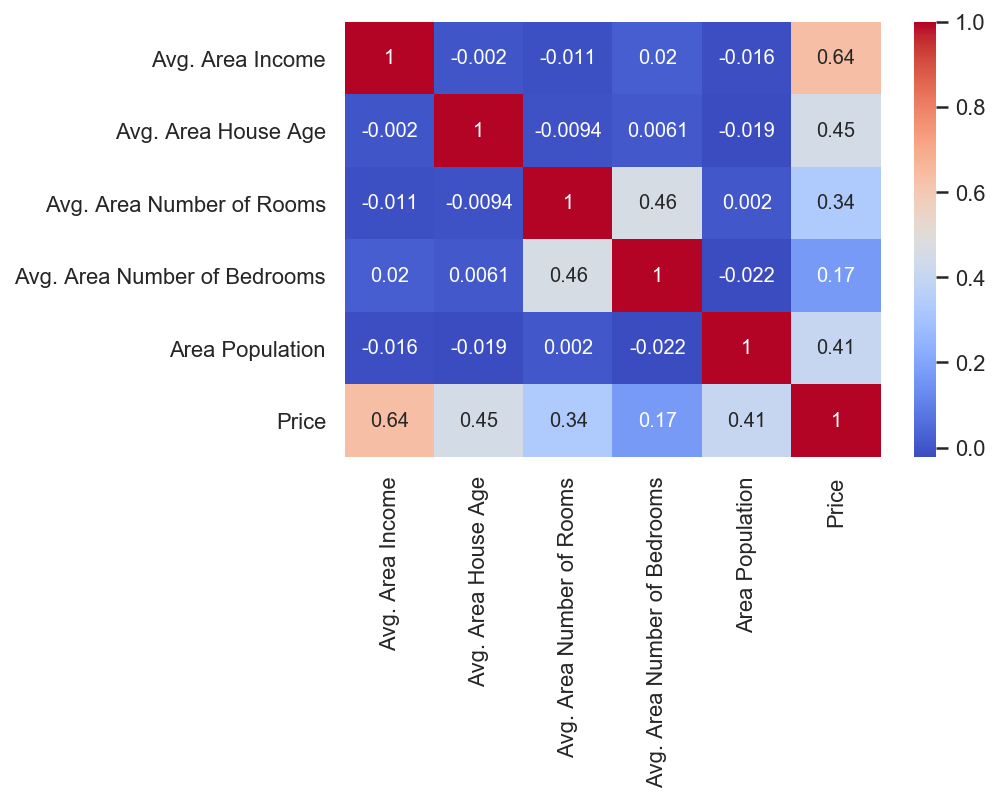

In [9]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

### Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [10]:
# DEFINE THE FEATURE VARIABLES X
X = df[['Avg. Area Income', 
        'Avg. Area House Age', 
        'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 
        'Area Population']]

In [11]:
# DEFINE THE TARGET VARIABLE y
y = df['Price']

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# DEFINE THE TRAINING AND TEST DATA SETS. 
# TRAINING SET WILL BE USED TO CREATE THE MODEL AND TEST SET WILL BE USED TO TEST THAT MODEL.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=101)

### Creating and Training the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# CREATE A LINEAR REGRESSION MODEL OBJECT
lm = LinearRegression()

In [16]:
# FIT THE LINEAR MODEL TO THE TRAINING DATA SETS
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [17]:
# INTERCEPT IS THE INDEPENDANT COEFFICIENT IN THE LINEAR MODEL
lm.intercept_

-2640159.7968516266

In [18]:
# DEPENDANT COEFFICIENTS
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [19]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [20]:
# CREATE THE COEFFICIENTS DATAFRAME(THE ACTUAL LINEAR REGRESSION EQUATION)
cdf = pd.DataFrame(lm.coef_, index=X_train.columns, columns=["Coefficient"])
cdf

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an *increase of \$21.52*.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an *increase of \$164883.28*.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an *increase of \$122368.67*.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an *increase of \$2233.80*.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an *increase of \$15.15*.

### Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [21]:
# PREDICTIONS (TEST THE NEWLY CREATED LINEAR MODEL WITH TEST DATA SET)
predictions = lm.predict(X_test)

In [22]:
# PREDICTED PRICES OF THE HOUSES ACCORDING TO THE LINEAR MODEL
predictions

array([1260960.70567625,  827588.75560359, 1742421.24254323, ...,
        372191.40626965, 1365217.15140894, 1914519.54178805])

In [23]:
# statsmodels is a Python module that provides classes and functions 
# for the estimation of many different statistical models, as well as 
# for conducting statistical tests, and statistical data exploration

import statsmodels.api as sm
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.702e+04
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:48:11   Log-Likelihood:                -69078.
No. Observations:                5000   AIC:                         1.382e+05
Df Residuals:                    4995   BIC:                         1.382e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2372      0.269     38.106      0.000       9.711      10.764
Avg. Area House Age            5.13e+04   2960.917     17.324      0.000    4.55e+04    5.71e+04
Avg. Area Number of Rooms    -9614.4333   3262.997     -2.947      0.003    -1.6e+04   -3217.527
Avg. Area Number of Bedrooms  4082.3129   3132.333      1.303      0.193   -2058.435    1.02e+04
Area Population                  8.0918      0.327     24.745      0.000       7.451       8.733
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.490
Skew:                          -0.012   Prob(JB):                        0.783
Kurtosis:                       2.958   Cond. No.                     9.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# ACTUAL HOUSE PRICES DATASET
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

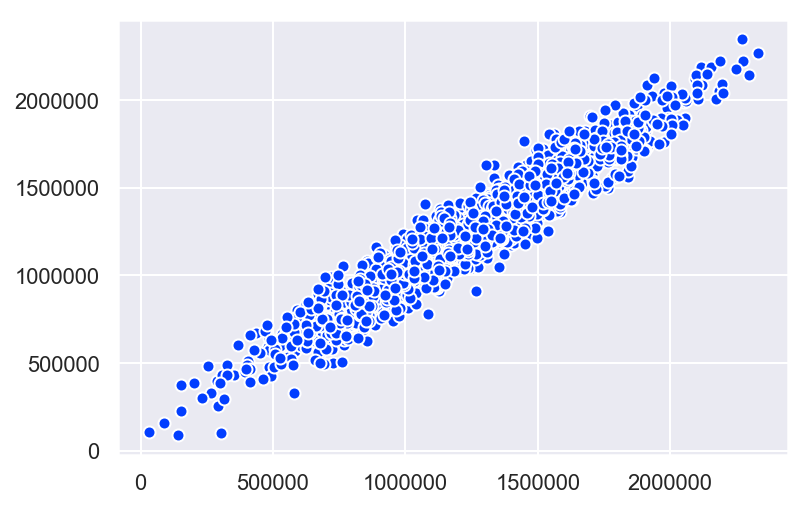

In [25]:
plt.scatter(y_test, predictions, edgecolors="w")

### Residual Histogram

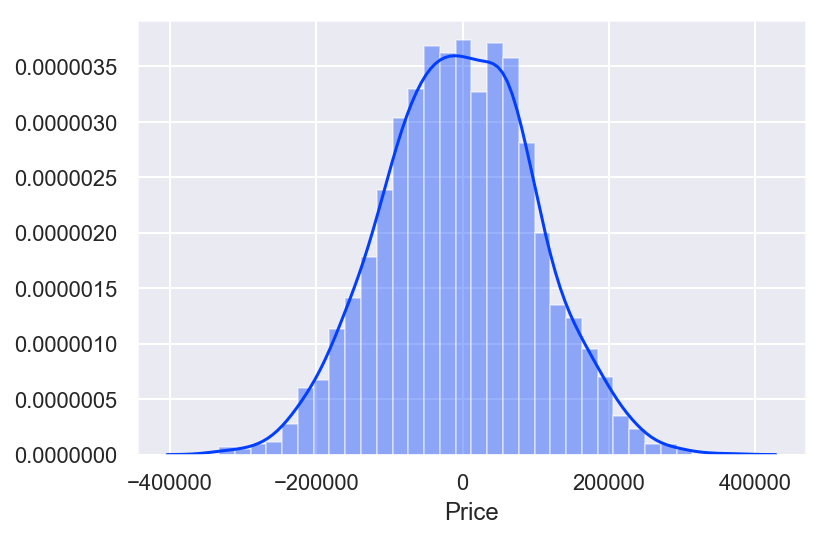

In [26]:
# THE DIFFERENCE BETWEEN ACTUAL AND PREDICTED PRICES
sns.distplot(y_test-predictions)

### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [27]:
from sklearn import metrics

In [28]:
metrics.mean_absolute_error(y_test, predictions)

82288.2225191496

In [29]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209688

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291245